I first constructed annual CRFs and then calculate the orientation angles between them and ICRF3.

Here I presented the first method, which is that I divided the data annually and run yearly solutions with identical setup.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# My progs
from my_progs.vlbi.read_sou import read_sou
from my_progs.catalog.read_icrf import read_icrf3
from my_progs.catalog.pos_diff import radio_cat_diff_calc
from my_progs.stat_func.rms_calc import rms_calc
from tool_func import calc_orient

Calculate the orientation parameters.

In [2]:
icrf3sx = read_icrf3(wv="sx")

icrf3def = icrf3sx[icrf3sx["type"] == "D"]

In [3]:
years = np.arange(1984, 2021)
# years = np.arange(2000, 2004)

num = len(years)

In [4]:
N0 = np.zeros_like(years)
N1 = np.zeros_like(years)
pmt = np.empty((num, 8), dtype=np.float)
err = np.empty((num, 8), dtype=np.float)

In [5]:
N0_d = np.zeros_like(years)
N1_d = np.zeros_like(years)
pmt_d = np.empty((num, 8), dtype=np.float)
err_d = np.empty((num, 8), dtype=np.float)

In [6]:
for i, year in enumerate(years):
    
    print("\nProcessing solutions based on VLBI observations from 1979 to", year)
    
    glo_sou = read_sou("../data/yearly-solution/{:d}-c.sou".format(year), drop_few_obs=True)
    
    # ICRF3 defining sources
    pos_oft = radio_cat_diff_calc(glo_sou, icrf3def, sou_name="iers_name")
    N0_d[i], N1_d[i], pmt_d[i], err_d[i] = calc_orient(pos_oft)

    # All sources
    pos_oft = radio_cat_diff_calc(glo_sou, icrf3sx, sou_name="iers_name")
    N0[i], N1[i], pmt[i], err[i] = calc_orient(pos_oft)


Processing solutions based on VLBI observations from 1979 to 1984
There are 112 sources in the original catalog, 10 (9%) sources with #obs < 3 dropped, leaving 102 sources in the present catalog.

Processing solutions based on VLBI observations from 1979 to 1985
There are 112 sources in the original catalog, 10 (9%) sources with #obs < 3 dropped, leaving 102 sources in the present catalog.

Processing solutions based on VLBI observations from 1979 to 1986
There are 117 sources in the original catalog, 10 (9%) sources with #obs < 3 dropped, leaving 107 sources in the present catalog.

Processing solutions based on VLBI observations from 1979 to 1987
There are 224 sources in the original catalog, 18 (8%) sources with #obs < 3 dropped, leaving 206 sources in the present catalog.

Processing solutions based on VLBI observations from 1979 to 1988
There are 362 sources in the original catalog, 52 (14%) sources with #obs < 3 dropped, leaving 310 sources in the present catalog.

Processing so

In [21]:
# years_cor = np.arange(2000, 2004)
# years_cor = np.arange(2001, 2003)
years_cor = np.arange(2006, 2007)

num = len(years_cor)

pmt_d_cor = np.empty((num, 8), dtype=np.float)
err_d_cor = np.empty((num, 8), dtype=np.float)

# pmt_d_cor[0] = pmt_d[2000 - 1984]
# err_d_cor[0] = err_d[2000 - 1984]
# pmt_d_cor[3] = pmt_d[2003 - 1984]
# err_d_cor[3] = err_d[2003 - 1984]

# for i in range(1, 3):
for i in range(2):
    year = years_cor[i]

    print("\nProcessing solutions based on VLBI observations from 1979 to",
          year)

    glo_sou = read_sou("../data/yearly-solution/{:d}-c-cor.sou".format(year),
                       drop_few_obs=True)

    # ICRF3 defining sources
    pos_oft = radio_cat_diff_calc(glo_sou, icrf3def, sou_name="iers_name")
    x, y, pmt_d_cor[i], err_d_cor[i] = calc_orient(pos_oft)


Processing solutions based on VLBI observations from 1979 to 2006
There are 4305 sources in the original catalog, 1042 (24%) sources with #obs < 3 dropped, leaving 3263 sources in the present catalog.


IndexError: index 1 is out of bounds for axis 0 with size 1

# ICRF3 defining sources only

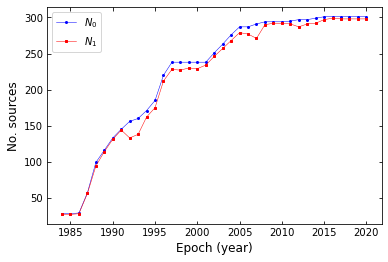

In [8]:
fig, ax = plt.subplots()

ax.plot(years, N0_d, "b-o", ms=2, lw=0.5, label="$N_0$")
ax.plot(years, N1_d, "r-s", ms=2, lw=0.5, label="$N_1$")

# ax.set_yscale("log")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("No. sources", fontsize=12)
ax.legend()

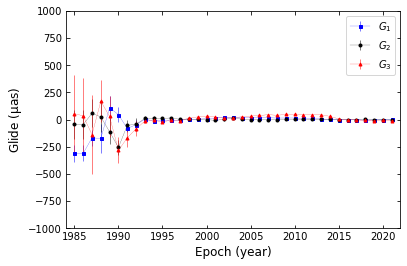

In [9]:
fig, ax = plt.subplots()

ax.errorbar(years+1, pmt_d[:,0], yerr=err_d[:,0], color="blue", 
            ms=3, fmt="-s", elinewidth=0.5, lw=0.2, label="$G_1$")
ax.errorbar(years+1, pmt_d[:,1], yerr=err_d[:,1], color="black", 
            ms=3, fmt="-o", elinewidth=0.5, lw=0.2, label="$G_2$")
ax.errorbar(years+1, pmt_d[:,2], yerr=err_d[:,2], color="red", 
            ms=3, fmt="-^", elinewidth=0.5, lw=0.2, label="$G_3$")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Glide ($\mathrm{\mu as}$)", fontsize=12)

ax.axis([1984, 2022, -1000, 1000])
ax.legend()

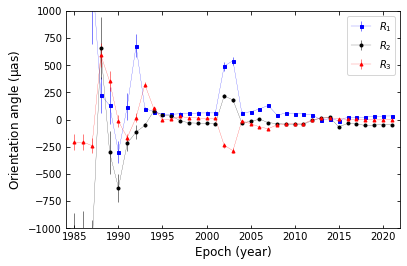

In [10]:
fig, ax = plt.subplots()

ax.errorbar(years+1, pmt_d[:, 3], yerr=err_d[:, 3], color="blue",
            ms=3, fmt="-s", elinewidth=0.5, lw=0.2, label="$R_1$")
ax.errorbar(years+1, pmt_d[:, 4], yerr=err_d[:, 4], color="black",
            ms=3, fmt="-o", elinewidth=0.5, lw=0.2, label="$R_2$")
ax.errorbar(years+1, pmt_d[:, 5], yerr=err_d[:, 5], color="red",
            ms=3, fmt="-^", elinewidth=0.5, lw=0.2, label="$R_3$")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Orientation angle ($\mathrm{\mu as}$)", fontsize=12)

ax.axis([1984, 2022, -1000, 1000])
ax.legend()

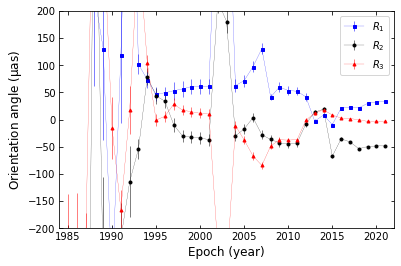

In [11]:
fig, ax = plt.subplots()

ax.errorbar(years+1, pmt_d[:, 3], yerr=err_d[:, 3], color="blue",
            ms=3, fmt="-s", elinewidth=0.5, lw=0.2, label="$R_1$")
ax.errorbar(years+1, pmt_d[:, 4], yerr=err_d[:, 4], color="black",
            ms=3, fmt="-o", elinewidth=0.5, lw=0.2, label="$R_2$")
ax.errorbar(years+1, pmt_d[:, 5], yerr=err_d[:, 5], color="red",
            ms=3, fmt="-^", elinewidth=0.5, lw=0.2, label="$R_3$")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Orientation angle ($\mathrm{\mu as}$)", fontsize=12)

ax.axis([1984, 2022, -200, 200])
ax.legend()

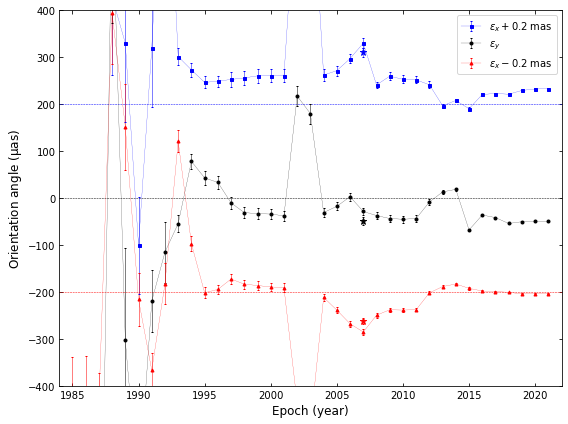

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(200, 1984, 2025, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 1984, 2025, ls="dashed", color="k", lw=0.5)
ax.hlines(-200, 1984, 2025, ls="dashed", color="r", lw=0.5)

ax.errorbar(years+1,
            pmt_d[:, 3] + 200,
            yerr=err_d[:, 3],
            color="blue",
            ms=3,
            fmt="-s",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_x+0.2$ mas",
            capsize=1)
ax.errorbar(years+1,
            pmt_d[:, 4],
            yerr=err_d[:, 4],
            color="black",
            ms=3,
            fmt="-o",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_y$",
            capsize=1)
ax.errorbar(years+1,
            pmt_d[:, 5] - 200,
            yerr=err_d[:, 5],
            color="red",
            ms=3,
            fmt="-^",
            elinewidth=0.5,
            lw=0.2,
            label="$\\epsilon_x-0.2$ mas",
            capsize=1)

ax.errorbar(years_cor+1,
            pmt_d_cor[:, 3] + 200,
            yerr=err_d_cor[:, 3],
            color="blue",
            ms=7,
            fmt="*",
            elinewidth=0.5,
            lw=0.2,
#             label="$\\epsilon_x+0.2$ mas",
            capsize=1)
ax.errorbar(years_cor+1,
            pmt_d_cor[:, 4],
            yerr=err_d_cor[:, 4],
            color="black",
            ms=7,
            fmt="*",
            elinewidth=0.5,
            lw=0.2,
#             label="$\\epsilon_y$",
            capsize=1)
ax.errorbar(years_cor+1,
            pmt_d_cor[:, 5] - 200,
            yerr=err_d_cor[:, 5],
            color="red",
            ms=7,
            fmt="*",
            elinewidth=0.5,
            lw=0.2,
#             label="$\\epsilon_x-0.2$ mas",
            capsize=1)

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Orientation angle ($\mathrm{\mu as}$)", fontsize=12)

ax.axis([1984, 2022, -400, 400])
# ax.legend(bbox_to_anchor=(1.01, 1))
ax.legend()

plt.tight_layout()
# plt.savefig("../plots/orient-from-yearly-solution.eps")

In [13]:
wmean1, wrms1, wstd1 = rms_calc(pmt_d[:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[:, 5])

print("Rotation statistics (No weighted)")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))


wmean1, wrms1, wstd1 = rms_calc(pmt_d[:, 3], err_d[:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[:, 4], err_d[:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[:, 5], err_d[:, 5])

print("Rotation statistics (No weighted)")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Rotation statistics (No weighted)
    Mean   RMS  Std
    uas    uas  uas
R1  +270   699  644
R2  -115   375  356
R3    -6   160  160
Rotation statistics (No weighted)
    Mean  WRMS Std
    uas   uas  uas
R1   +26  34  22
R2   -41  48  24
R3    -4  22  22


Consider data points after 1995, and remove 2001 and 2002, then re-calculate the statistics.

In [14]:
mask = ((years>=1995)&(years!=2001)&(years!=2002))

In [15]:
wmean1, wrms1, wstd1 = rms_calc(pmt_d[mask][:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[mask][:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[mask][:, 5])

print("Rotation statistics (No weighted, Remove data < 1995, 2002, 2003)")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

wmean1, wrms1, wstd1 = rms_calc(pmt_d[mask][:, 3], err_d[mask][:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[mask][:, 4], err_d[mask][:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[mask][:, 5], err_d[mask][:, 5])

print("Rotation statistics (Weighted, Remove data < 1995, 2002, 2003)")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Rotation statistics (No weighted, Remove data < 1995, 2002, 2003)
    Mean   RMS  Std
    uas    uas  uas
R1   +46    56  30
R2   -28    38  25
R3   -10    31  29
Rotation statistics (Weighted, Remove data < 1995, 2002, 2003)
    Mean  WRMS Std
    uas   uas  uas
R1   +26  30  16
R2   -42  47  19
R3    -3  16  15


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


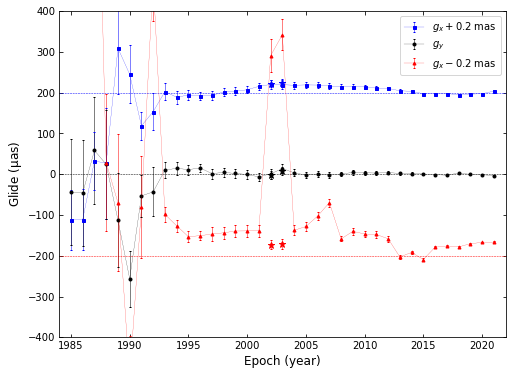

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(200, 1984, 2025, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 1984, 2025, ls="dashed", color="k", lw=0.5)
ax.hlines(-200, 1984, 2025, ls="dashed", color="r", lw=0.5)

ax.errorbar(years+1,
            pmt_d[:, 0] + 200,
            yerr=err_d[:, 0],
            color="blue",
            ms=3,
            fmt="-s",
            elinewidth=0.5,
            lw=0.2,
            label="$g_x+0.2$ mas",
            capsize=1)
ax.errorbar(years+1,
            pmt_d[:, 1],
            yerr=err_d[:, 1],
            color="black",
            ms=3,
            fmt="-o",
            elinewidth=0.5,
            lw=0.2,
            label="$g_y$",
            capsize=1)
ax.errorbar(years+1,
            pmt_d[:, 3] - 200,
            yerr=err_d[:, 3],
            color="red",
            ms=3,
            fmt="-^",
            elinewidth=0.5,
            lw=0.2,
            label="$g_x-0.2$ mas",
            capsize=1)

ax.errorbar(years_cor+1,
            pmt_d_cor[:, 0] + 200,
            yerr=err_d_cor[:, 0],
            color="blue",
            ms=7,
            fmt="*",
            elinewidth=0.5,
            lw=0.2,
#             label="$\\epsilon_x+0.2$ mas",
            capsize=1)
ax.errorbar(years_cor+1,
            pmt_d_cor[:, 1],
            yerr=err_d_cor[:, 1],
            color="black",
            ms=7,
            fmt="*",
            elinewidth=0.5,
            lw=0.2,
#             label="$\\epsilon_y$",
            capsize=1)
ax.errorbar(years_cor+1,
            pmt_d_cor[:, 2] - 200,
            yerr=err_d_cor[:, 2],
            color="red",
            ms=7,
            fmt="*",
            elinewidth=0.5,
            lw=0.2,
#             label="$\\epsilon_x-0.2$ mas",
            capsize=1)

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Glide ($\mathrm{\mu as}$)", fontsize=12)

ax.axis([1984, 2022, -400, 400])
# ax.legend(bbox_to_anchor=(1.01, 1))
ax.legend()
plt.savefig("../plots/glide-from-yearly-solution.eps")

# All sources

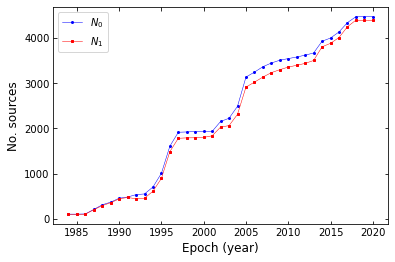

In [17]:
fig, ax = plt.subplots()

ax.plot(years, N0, "b-o", ms=2, lw=0.5, label="$N_0$")
ax.plot(years, N1, "r-s", ms=2, lw=0.5, label="$N_1$")

# ax.set_yscale("log")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("No. sources", fontsize=12)
ax.legend()

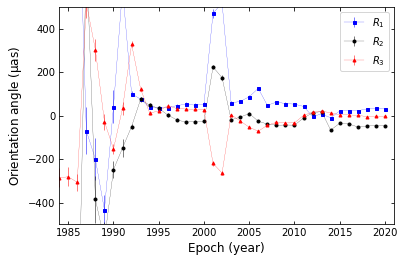

In [18]:
fig, ax = plt.subplots()

ax.errorbar(years, pmt[:, 3], yerr=err[:, 3], color="blue",
            ms=3, fmt="-s", elinewidth=0.5, lw=0.2, label="$R_1$")
ax.errorbar(years, pmt[:, 4], yerr=err[:, 4], color="black",
            ms=3, fmt="-o", elinewidth=0.5, lw=0.2, label="$R_2$")
ax.errorbar(years, pmt[:, 5], yerr=err[:, 5], color="red",
            ms=3, fmt="-^", elinewidth=0.5, lw=0.2, label="$R_3$")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Orientation angle ($\mathrm{\mu as}$)", fontsize=12)
ax.axis([1984, 2021, -500, 500])
ax.legend()


In [19]:
wmean1, wrms1, wstd1 = rms_calc(pmt[:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt[:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt[:, 5])

print("Rotation statistics (No weighted)")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

wmean1, wrms1, wstd1 = rms_calc(pmt[:, 3], err[:, 3])
wmean2, wrms2, wstd2 = rms_calc(pmt[:, 4], err[:, 4])
wmean3, wrms3, wstd3 = rms_calc(pmt[:, 5], err[:, 5])

print("Rotation statistics (Weighted)")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Rotation statistics (No weighted)
    Mean   RMS  Std
    uas    uas  uas
R1  +234   676  633
R2  -120   404  385
R3    -8   158  158
Rotation statistics (Weighted)
    Mean  WRMS Std
    uas   uas  uas
R1   +28  42  31
R2   -37  48  31
R3    -3  27  27
